In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA630/refs/heads/master/data/Telco_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
## checking for missing values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [3]:
df.select_dtypes('O').nunique()

,0
customerID,7043
gender,2
Partner,2
Dependents,2
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3
DeviceProtection,3


In [4]:
# prompt: get rid of $ and convert to numeric for totalcharges
df['TotalCharges'] = df['TotalCharges'].str.replace('$', '')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [5]:
df.dropna(inplace=True)

In [6]:
df.drop('customerID', axis=1, inplace=True)

In [7]:
## create X and y vector
X = df.drop('Churn', axis=1)
y = df['Churn']

In [8]:
## dummy encode X
X = pd.get_dummies(X, drop_first=True, dtype=int)

In [9]:
## Partition 70% and 30% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=630)

In [10]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression

## instance
logreg = LogisticRegression(penalty = None, solver = "sag") ## stochastic average gradient

## fit
logreg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [12]:
y_train = y_train.map({'Yes': 1, 'No': 0})
y_test = y_test.map({'Yes': 1, 'No': 0})

In [16]:
## loss function
## error of the model

## obs 1
y_true = y_train[0]

In [15]:
##
p_hat = logreg.predict_proba(X_train)[:, 1][0]

In [20]:
p_hat = 0.9999

In [24]:
y_true = 1
p_hat = 0.85

In [25]:
## the model predicts obs 1 with a prob of 0.4526 to be a churn, while the true value is "did not"
## compute the binary cross entropy
-(y_true * np.log(p_hat) + (1 - y_true) * np.log(1 - p_hat))

np.float64(0.16251892949777494)

In [22]:
## metrics
#### checking how the model is doing overall in formula you are familiar with
## loss

In [23]:
## loss functions are usually NOT used as metrics b/c they often are difficult to understand
## in the language of the problem, but they ARE VALID to use.

In [26]:
## y_true and p_hat are vectors
y_true = np.array([1,0,1,0])
p_hat = np.array([0.9,0.25,.8,.1])
-np.mean(y_true*np.log(p_hat) + (1-y_true)*np.log(1-p_hat))

np.float64(0.1803866637704108)

In [27]:
## concepts
## loss function is for 1 obs
## cost function is either a sum or an average of the loss on the training
## binary_crossentropy
## categorical_crossentropy
## mean squared error (reg)
## mean absolute error (reg)

In [ ]:
## The cost function is called J(w)
## because different w will get you a different cost
## the vector w is the most important thing in every model

In [28]:
logreg.coef_ ## weights (slopes for every variable)

array([[ 3.85677303e-04, -4.07664438e-02,  5.91844725e-03,
        -1.76418604e-05, -7.88430207e-04, -6.86041676e-04,
        -8.83608150e-04, -1.31874565e-03, -1.73501084e-04,
         3.54632188e-04,  1.18109277e-03, -1.50611024e-03,
        -1.50611024e-03, -6.14221672e-04, -1.50611024e-03,
        -1.25041919e-04, -1.50611024e-03, -1.01334609e-04,
        -1.50611024e-03, -5.69963989e-04, -1.50611024e-03,
         4.28961398e-04, -1.50611024e-03,  3.67024997e-04,
        -7.23150075e-04, -8.78184383e-04,  1.50804562e-04,
        -5.46447520e-04,  7.56916380e-04, -1.25873660e-03]])

In [29]:
## 1 single bias
logreg.intercept_ ## bias

array([-0.00149225])

In [32]:
logreg.coef_[0][:3] # slopes for the first 3 variables

array([ 0.00038568, -0.04076644,  0.00591845])

In [ ]:
## learning curves
## plot of cost function (y) vs iteration or step or epoch (x)
## a curve for training and a curve for the test

**Fashion MNIST data set**

In [33]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [34]:
## shape
X_train.shape

(60000, 28, 28)

In [35]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

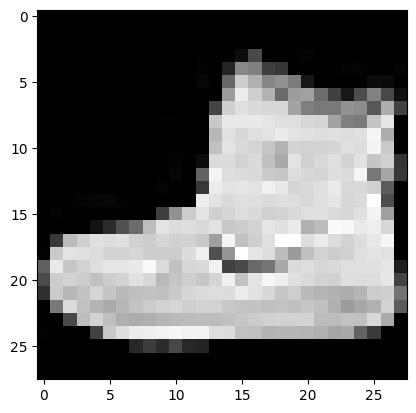

In [36]:
plt.imshow(X_train[0], cmap='gray');

In [38]:
## Example for categorical cross entropy loss function
## y_true = [0,0,0,0,0,0,1,0,0,0]
## p_hat = [0.05,0.02   ....]

## however for easier calculation
## you just need the probability of the right class (0.40)
-(1*np.log(0.40))

np.float64(0.916290731874155)

In [41]:
## Calculating the L1 norm and L2 norm
## regularization
## J(w) = cost + penalty
## penalty = ||w||_2^2 or ||w||_1^2
## J(w) = 10 --- this is the lowest J(w) the model was able to get to in gradient descent
w = np.array([0.000, 0.05, 0.25])
penalty = np.linalg.norm(w)**2

In [42]:
penalty

np.float64(0.065)

In [45]:
## Images
## 28x28
## 4000x 6000

## We need to flatten them
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [44]:
28*28

784

In [46]:
## create a nn model
## input layer
## hidden layer 1 (activation = "relu") with 64 neurons
## output layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten

nn = Sequential()
nn.add(Input(shape=(784,)))
## nn.add(Flatten(input_shape = (28,28)))
nn.add(Dense(64, activation='relu'))
nn.add(Dense(10, activation='softmax'))

In [48]:
784*64+64     + 64*10+10

50890

In [47]:
## calculate the number of parameters
nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
## compile
nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])